**Ex2 - OneNet Implementation**

Sources:

1.   https://github.com/mmaithani/data-science/blob/main/OneNet.ipynb
2.   https://github.com/PeizeSun/OneNet
3.   https://analyticsindiamag.com/onenet/

OneNet is an end to end one-stage object detector that purposes new techniques for object detection like Minimum Cost assignment. Its latest paper was published on 10 Dec 2020 by Peize Sun, Yi Jiang, Enze Xie, Zehuan Yuan, Changhu Wang, and Ping Luo at The University of Hong Kong It was the collaboration with ByteDance AI lab. 

OneNet is a fully convolutional one stage detector without any post-processing technique such as NMS(non-maximal suppression).

In this Implementation we will pass the train section and used a trained model called "onenet_r18dcn.pth" and can be download from [here](https://drive.google.com/drive/folders/1LnHMj7pkJhODeZTNHW-UcUZxybKbQmTB)

The model sit on our Google drive.


**Students:**

Sahar Israel - 205654536

Avi Bechavod - 200675981

Harel Yadaan - 207331125



# **Implementation**

**1.** install torchvision using below command:


In [1]:
pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4MB 25kB/s 
     |████████████████████████████████| 12.8MB 236kB/s 
     |████████████████████████████████| 7.6MB 17.1MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1+cu101 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101


**2.** install the current version of pyyaml and pycocotools.

Check if cuda is available:

In [2]:
!pip install pyyaml==5.1 pycocotools>=2.0.1

In [3]:
import torch, torchvision
from IPython.display import Image
from IPython.display import display

print(torch.__version__, torch.cuda.is_available())

1.7.1+cu101 True


**3.** Clone & Install from source:

In [4]:
!git clone https://github.com/PeizeSun/OneNet.git

Cloning into 'OneNet'...
remote: Enumerating objects: 602, done.
remote: Counting objects: 100% (602/602), done.
remote: Compressing objects: 100% (499/499), done.
remote: Total 602 (delta 135), reused 523 (delta 93), pack-reused 0
Receiving objects: 100% (602/602), 1.50 MiB | 24.78 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [5]:
cd OneNet


/content/OneNet


In [6]:
!python setup.py build develop

running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/detectron2
copying detectron2/__init__.py -> build/lib.linux-x86_64-3.7/detectron2
creating build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/defaults.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/compat.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/config.py -> build/lib.linux-x86_64-3.7/detectron2/config
creating build/lib.linux-x86_64-3.7/detectron2/solver
copying detectron2/solver/build.py -> build/lib.linux-x86_64-3.7/detectron2/solver
copying detectron2/solver/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/solver
copying detectron2/solver/lr_scheduler.py -> build/lib.linux-x86_64-3.7/detectron2/solver
creating build/lib.linux-x86_64-3.7/detectron2/structures
copying detectron2/structures/boxe

**4.** Now, we will pass the section of the training.We will mount to Google drive to get access for a trained model.


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**5.** Evaluate:

In [8]:
!python projects/OneNet/train_net.py --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --eval-only MODEL.WEIGHTS /content/drive/MyDrive/deepLearning/ex2/trained.models/onenet_r18dcn.pth

Command Line Args: Namespace(config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=True, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', '/content/drive/MyDrive/deepLearning/ex2/trained.models/onenet_r18dcn.pth'], resume=False)
[06/06 19:14:46 detectron2]: Rank of current process: 0. World size: 1
[06/06 19:14:46 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.10 (default, May  3 2021, 02:48:31) [GCC 7.5.0]
numpy                   1.19.5
detectron2              0.3 @/content/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.0
detectron2 arch flags   7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla T4 (

**6.** Visualize:

We will run the model on several images to see the results.

[get image as input and make an image for the output.]

In [14]:
!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/drive/MyDrive/deepLearning/ex2/photos/image_1.jpg --output /content/image_1_result.jpg --confidence-threshold 0.1 \
    --opts MODEL.WEIGHTS /content/drive/MyDrive/deepLearning/ex2/trained.models/onenet_r18dcn.pth

!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/drive/MyDrive/deepLearning/ex2/photos/image_1.jpg --output /content/image_2_result.jpg --confidence-threshold 0.2 \
    --opts MODEL.WEIGHTS /content/drive/MyDrive/deepLearning/ex2/trained.models/onenet_r18dcn.pth

!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/drive/MyDrive/deepLearning/ex2/photos/image_1.jpg --output /content/image_3_result.jpg --confidence-threshold 0.3 \
    --opts MODEL.WEIGHTS /content/drive/MyDrive/deepLearning/ex2/trained.models/onenet_r18dcn.pth

!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/drive/MyDrive/deepLearning/ex2/photos/image_1.jpg --output /content/image_4_result.jpg --confidence-threshold 0.4 \
    --opts MODEL.WEIGHTS /content/drive/MyDrive/deepLearning/ex2/trained.models/onenet_r18dcn.pth

!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/drive/MyDrive/deepLearning/ex2/photos/image_1.jpg --output /content/image_5_result.jpg --confidence-threshold 0.6 \
    --opts MODEL.WEIGHTS /content/drive/MyDrive/deepLearning/ex2/trained.models/onenet_r18dcn.pth

!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/drive/MyDrive/deepLearning/ex2/photos/image_1.jpg --output /content/image_6_result.jpg --confidence-threshold 0.8 \
    --opts MODEL.WEIGHTS /content/drive/MyDrive/deepLearning/ex2/trained.models/onenet_r18dcn.pth


[06/06 19:19:00 detectron2]: Arguments: Namespace(confidence_threshold=0.1, config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', input=['/content/drive/MyDrive/deepLearning/ex2/photos/image_1.jpg'], opts=['MODEL.WEIGHTS', '/content/drive/MyDrive/deepLearning/ex2/trained.models/onenet_r18dcn.pth'], output='/content/image_1_result.jpg', video_input=None, webcam=False)
[06/06 19:19:03 fvcore.common.checkpoint]: [Checkpointer] Loading from /content/drive/MyDrive/deepLearning/ex2/trained.models/onenet_r18dcn.pth ...
  0% 0/1 [00:00<?, ?it/s][06/06 19:19:04 detectron2]: /content/drive/MyDrive/deepLearning/ex2/photos/image_1.jpg: detected 83 instances in 0.16s
100% 1/1 [00:00<00:00,  2.74it/s]
[06/06 19:19:06 detectron2]: Arguments: Namespace(confidence_threshold=0.2, config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', input=['/content/drive/MyDrive/deepLearning/ex2/photos/image_1.jpg'], opts=['MODEL.WEIGHTS', '/content/drive/MyDrive/deepLearning/ex2/trained.models/onenet_r18

**Image 1:**

Original:

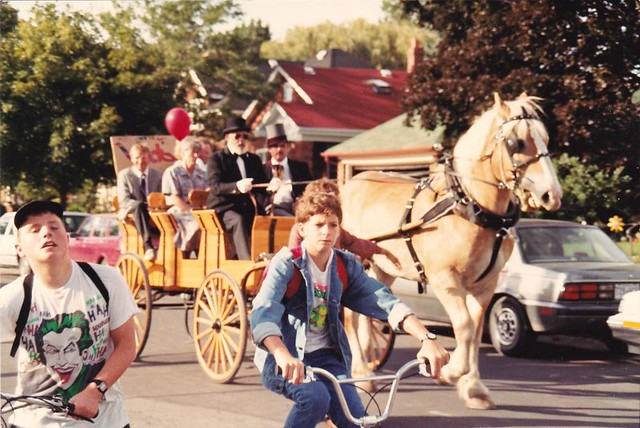

In [10]:
x = Image(filename='/content/drive/MyDrive/deepLearning/ex2/photos/image_1.jpg') 
display(x)

Output:

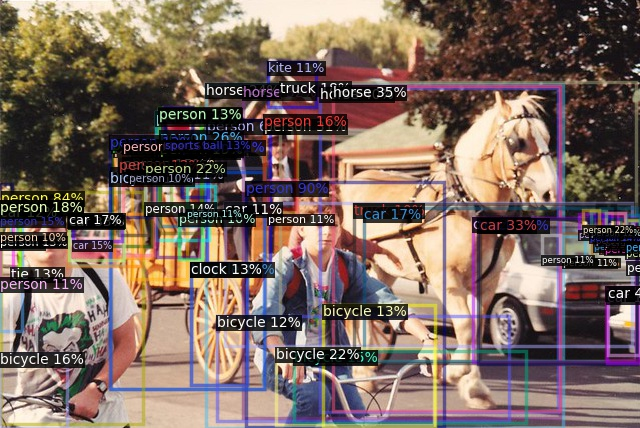

In [15]:
x = Image(filename='/content/image_1_result.jpg') 
display(x)

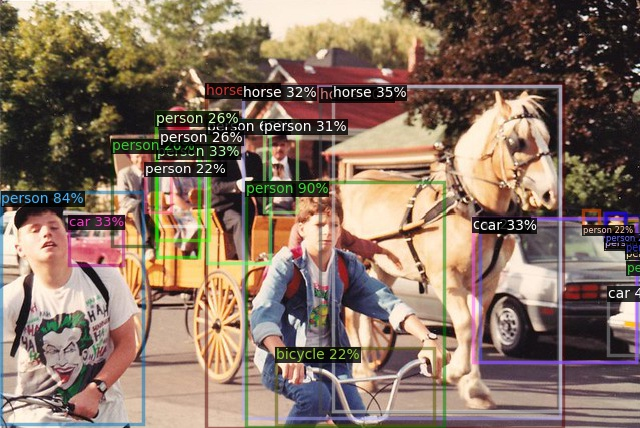

In [16]:
x = Image(filename='/content/image_2_result.jpg') 
display(x)

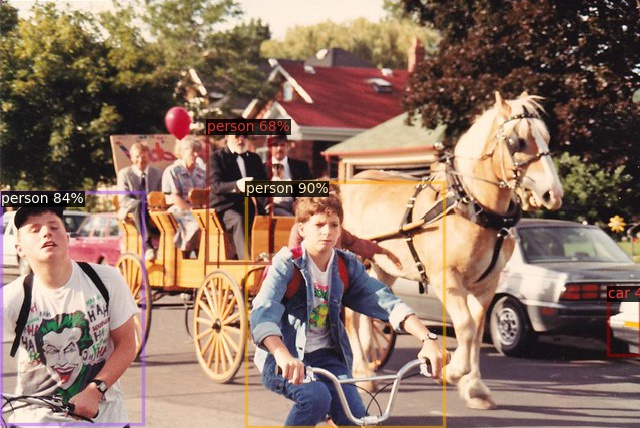

In [ ]:
x = Image(filename='/content/image_3_result.jpg') 
display(x)

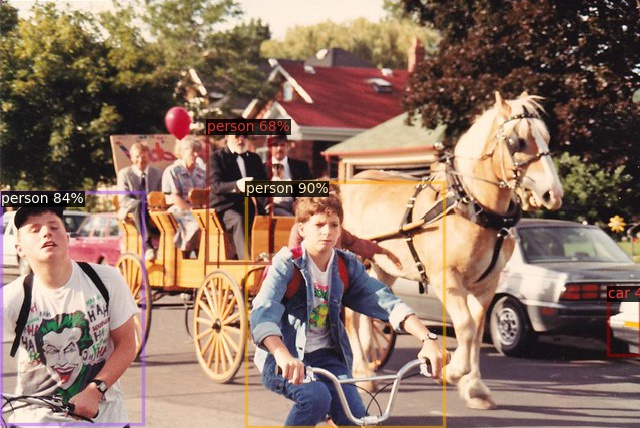

In [ ]:
x = Image(filename='/content/image_4_result.jpg') 
display(x)

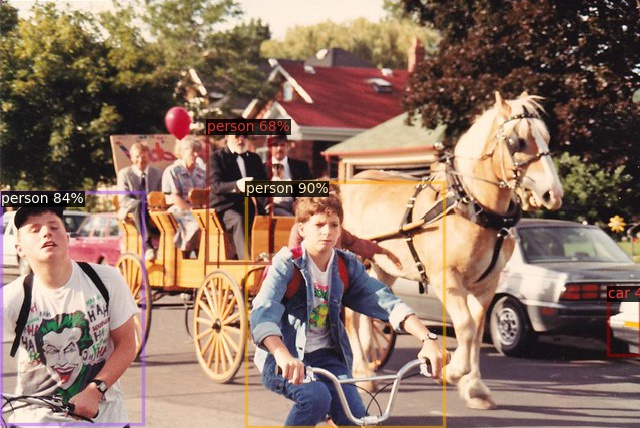

In [ ]:
x = Image(filename='/content/image_5_result.jpg') 
display(x)

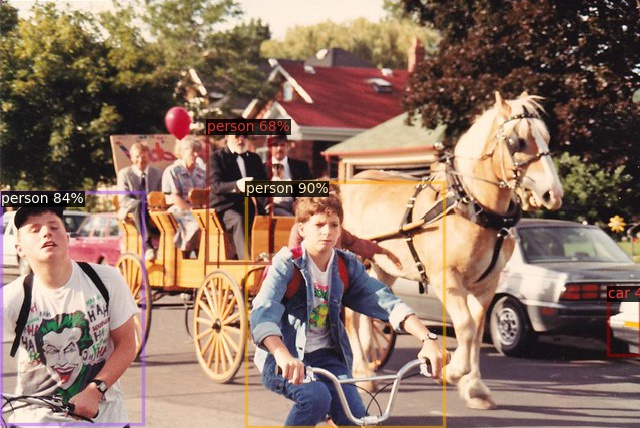

In [ ]:
x = Image(filename='/content/image_6_result.jpg') 
display(x)

**Image 2:**

Original:

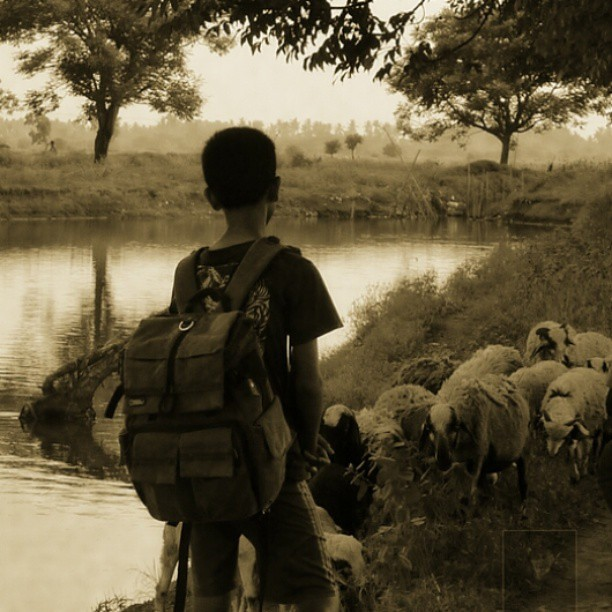

In [12]:
x = Image(filename='/content/drive/MyDrive/deepLearning/ex2/photos/image_2.jpg') 
display(x)

Output:

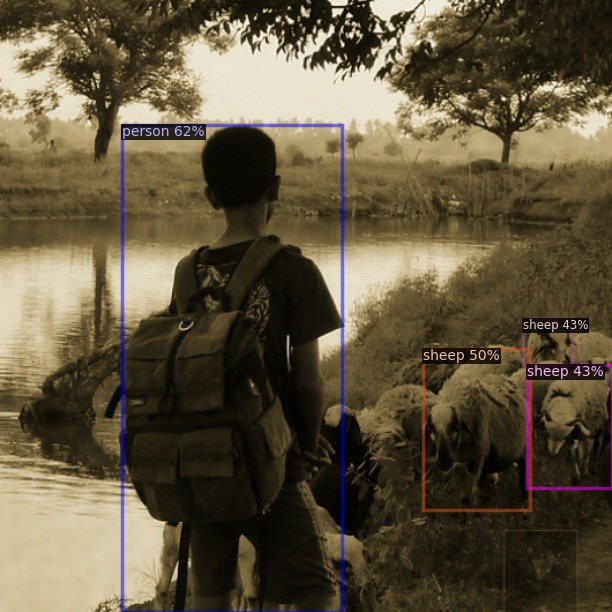

In [13]:
x = Image(filename='/content/image_2_result.jpg') 
display(x)